In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy

from rubin_sim.data import get_baseline
from os.path import basename


In [2]:
# Read in the data, convert to a numpy array
db_file = get_baseline()
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations;', con)
con.close()
visits_array = df.to_records(index=False)

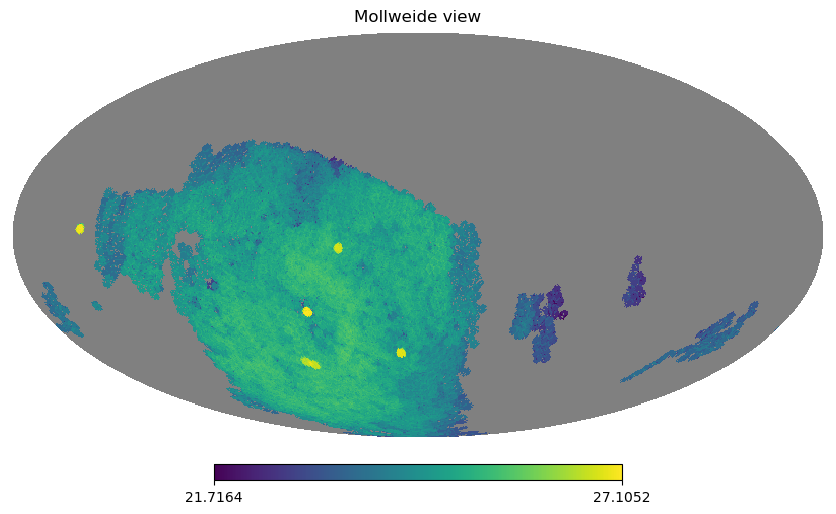

In [3]:
# Quick calc
sub_data = visits_array[np.where((visits_array["filter"] == "r") & (visits_array["night"] < 61))]
sl = maf.Slicer()
metric = maf.CoaddM5Metric("r")
# Run the metics through the slicer
hp_array = sl(sub_data, metric)
hp.mollview(hp_array)

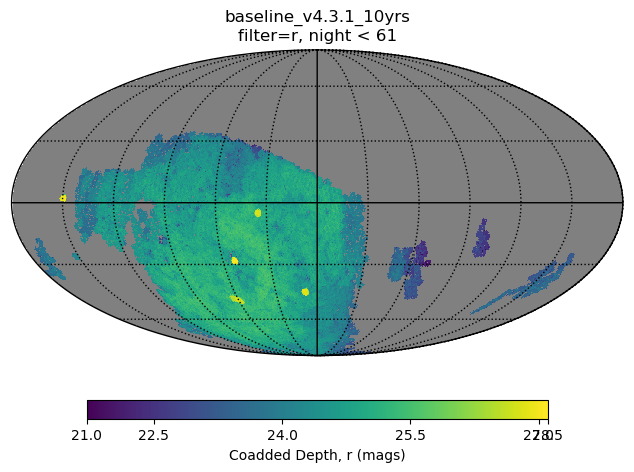

In [4]:
# If we want to use some automated label generation 
info = {"run_name": run_name}
filtername = "r"
night_limit = 61
sub_data = visits_array[np.where((visits_array["filter"] == filtername) & (visits_array["night"] < night_limit))]
info['observations_subset'] = "filter=%s, night < %i" % (filtername, night_limit)
sl = maf.Slicer()
metric = maf.CoaddM5Metric("r")
# Run the metics through the slicer
hp_array, info = sl(sub_data, metric, info=info)
pm = maf.PlotMoll(info=info)
fig = pm(hp_array)

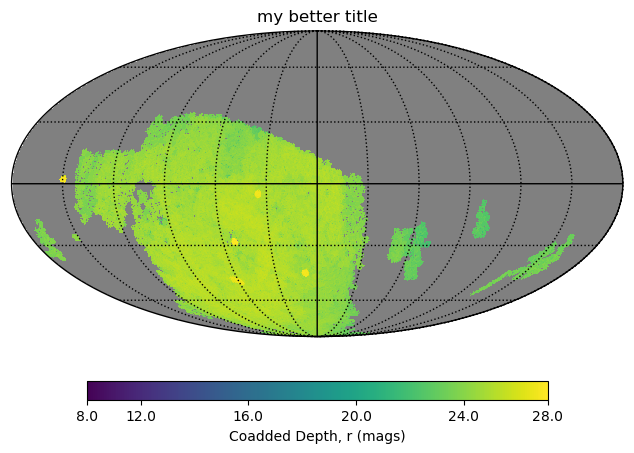

In [5]:
fig = pm(hp_array, title='my better title', min=10)

In [6]:
help(pm)

Help on PlotMoll in module rubin_sim.maf_proto.plots.plots object:

class PlotMoll(BasePlot)
 |  PlotMoll(info=None)
 |
 |  Plot a mollweild projection of a HEALpix array.
 |
 |  Method resolution order:
 |      PlotMoll
 |      BasePlot
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __call__(self, inarray, fig=None, add_grat=True, grat_params='default', cb_params='default', log=False, **kwargs)
 |      Parameters
 |      ----------
 |      inarray : `np.array`
 |          numpy array with proper HEALpix size.
 |      fig : `matplotlib.Figure`
 |          A matplotlib figure object. Default of None
 |          creates a new figure.
 |      add_grat : `bool`
 |          Add gratacule to the plot. Default True.
 |      grat_params : `dict`
 |          Dictionary of kwargs to pass to healpy.graticule.
 |          Default of "default" generates a reasonable dict.
 |      cb_params : `dict`
 |          Dictionary of color bar parameters. Default of "default"
 |          uses Pl